# Machine Learning for Digit Recognition

## Algorithm Used SVM-(Support Vector machine)

In [14]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


import matplotlib.pyplot as plt
%matplotlib inline

###  Reading datsets

In [15]:
path = 'C:/Users/PRADEEP/Desktop/datasets_svm'

count = 0
images = []     
classNo = []

myList = os.listdir(path)
print("Total Classes Detected:",len(myList))
noOfClasses = len(myList)
print("Importing Classes .......")
for x in range (0,noOfClasses):
    myPicList = os.listdir(path+"/"+str(x))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(x)+"/"+y,cv2.IMREAD_GRAYSCALE)
        curImg = cv2.resize(curImg,(128,128))
        images.append(curImg)
        classNo.append(x)
    print(x,end= " ")
print(" ")
print("Total Images in Images List = ",len(images))
print("Total IDS in classNo List= ",len(classNo))

Total Classes Detected: 10
Importing Classes .......
0 1 2 3 4 5 6 7 8 9  
Total Images in Images List =  1038
Total IDS in classNo List=  1038


###  Spliting training and testing datas

First we are converting an image into an numpy array. For easy visulatization of each pixel value of an image.

In [16]:
images = np.array(images)
classNo = np.array(classNo)

X_train,X_test,y_train,y_test = train_test_split(images,classNo,test_size=0.2,random_state = 1)

print(X_train.shape)
print(X_test.shape)



(830, 128, 128)
(208, 128, 128)


###  Visualizing the Image Data

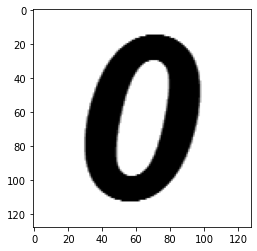

In [17]:
img1= X_train[0]
plt.imshow(img1,cmap='gray')

##  Preprocessing the data

### Normalization

In [18]:
X_train = X_train/255
X_test = X_test/255

### Flattening the data

In [19]:
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
# print(number_of_train)
# print(number_of_test)

X_train = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(number_of_test,X_test.shape[1]*X_test.shape[2])

# print("X train flatten",X_train.shape)
# print("X test flatten",X_test.shape)

## Training the model

In [20]:
model_linear = svm.SVC()
model_linear.fit(X_train,y_train)


SVC()

## Evaluating the model

In [21]:
predict  = model_linear.predict(X_train)
print(accuracy_score(predict, y_train))

1.0


In [22]:
test_pred = model_linear.predict(X_test)
print(accuracy_score(test_pred, y_test))

0.9759615384615384


## Classification report on each digit

In [23]:
predictions = model_linear.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       1.00      1.00      1.00        26
           2       1.00      0.94      0.97        16
           3       0.95      1.00      0.97        18
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        25
           6       1.00      1.00      1.00        19
           7       0.93      1.00      0.97        14
           8       0.88      1.00      0.94        22
           9       1.00      0.85      0.92        20

    accuracy                           0.98       208
   macro avg       0.98      0.97      0.97       208
weighted avg       0.98      0.98      0.98       208



## Testing the model on raw data

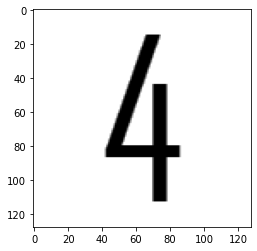

In [65]:
img = cv2.imread('C:/Users/PRADEEP/Desktop/13.png',cv2.IMREAD_GRAYSCALE)
img = img/255

img_size = 128
img1 = cv2.resize(img, (img_size, img_size))
img1.shape

plt.imshow(img1, cmap='gray')

In [66]:
img2 =img1.reshape(1,128*128)

In [67]:
digit= model_linear.predict(img2)
print('The digit is predicted as ', digit)

The digit is predicted as  [4]
